# Défi AI - statistiques descriptives

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import mca
from mca import MCA

from statsmodels.graphics.mosaicplot import mosaic

## Chargement des données

In [2]:
requests=pd.read_csv("data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['hotel_id'],axis=1)
requests=requests.drop(['Unnamed: 0'],axis=1)
requests=requests.drop(['order_requests','avatar_name'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile
hotel_id,,,,,,,,,,,
499,Accar Hotels,Marcure,madrid,0,1,0,148,66,30,dutch,0
888,Morriott International,Corlton,madrid,1,0,1,206,105,30,dutch,0
79,Boss Western,Boss Western,madrid,0,0,0,90,46,30,dutch,0
964,Morriott International,CourtYord,madrid,0,1,0,127,52,30,dutch,0
673,Yin Yang,Royal Lotus,madrid,0,0,0,154,73,30,dutch,0


## Quelques statistiques descriptives

### Etude de la variable `parking`

<font color='blue'> La variable prend la valeur 1 si l'hôtel dispose d'un parking et 0 sinon. <font>

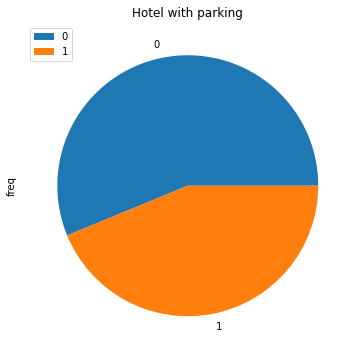

In [3]:
t = pd.crosstab(requests["parking"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with parking")
plt.show()

### Etude de la variable `pool`

<font color='blue'> La variable prend la valeur 1 si l'hôtel dispose d'une piscine payante et 0 sinon. <font>

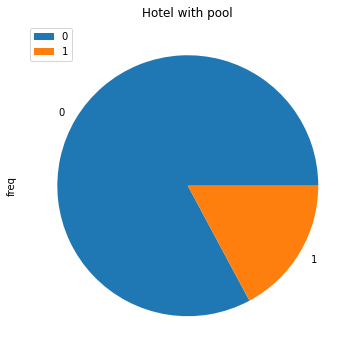

In [4]:
t = pd.crosstab(requests["pool"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with pool")
plt.show()

### Study of the variable ``children policy``

<font color='blue'> La variable prend la valeur 2 si l'hôtel interdit les enfants de moins de 18 ou 21 ans, 1 si l'hôtel interdit les enfants de moins de 12 ans et 0 sinon. <font>

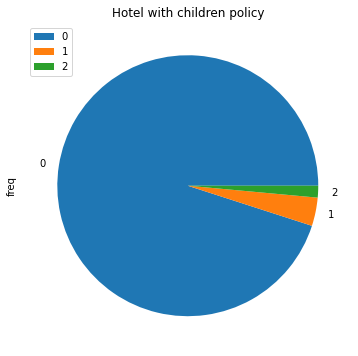

In [5]:
t = pd.crosstab(requests["children_policy"], "freq")
t.plot.pie(subplots=True,figsize=(6,6))
plt.legend(loc="upper left")
plt.title("Hotel with children policy")
plt.show()

### Etude des prix d'hôtels `price`

In [6]:
print("prix moyen :", requests["price"].mean())

prix moyen : 164.04597826885558


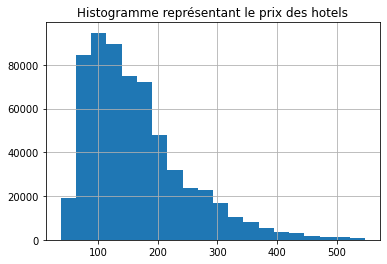

In [7]:
requests["price"].hist(bins=20)
plt.title("Histogramme représentant le prix des hotels")
plt.show()

<AxesSubplot: xlabel='children_policy', ylabel='price'>

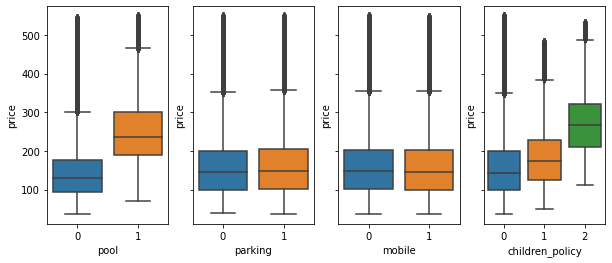

In [8]:
_, axes = plt.subplots(1, 4, sharey=True, figsize=(10, 4))
sns.boxplot(x='pool', y='price', data=requests,ax=axes[0])
sns.boxplot(x='parking', y='price', data=requests,ax=axes[1])
sns.boxplot(x='mobile', y='price', data=requests,ax=axes[2])
sns.boxplot(x='children_policy', y='price', data=requests,ax=axes[3])

<font color='blue'> Nous remarquons que la présence d'une piscine ou bien de réglementation par rapport aux enfants à tendance à augmenter les prix des hôtels. En revanche, les parkings ou l'outil de réservation n'ont pas l'air d'affecter les prix. <font>

<AxesSubplot: xlabel='city', ylabel='price'>

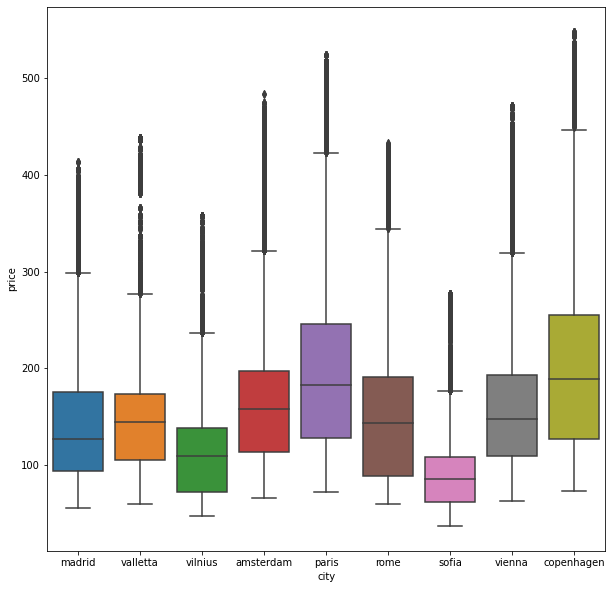

In [9]:
plt.figure(figsize = (10, 10))
sns.boxplot(x='city', y='price', data=requests)

<font color='blue'> On voit ici que les villes ont tendance à influencer le prix des hôtels. Par xemple, un hôtel à Paris ou à Copenhague sera en moyenne plus cher qu'un hôtel à Sofia. <font>

<AxesSubplot: xlabel='language', ylabel='price'>

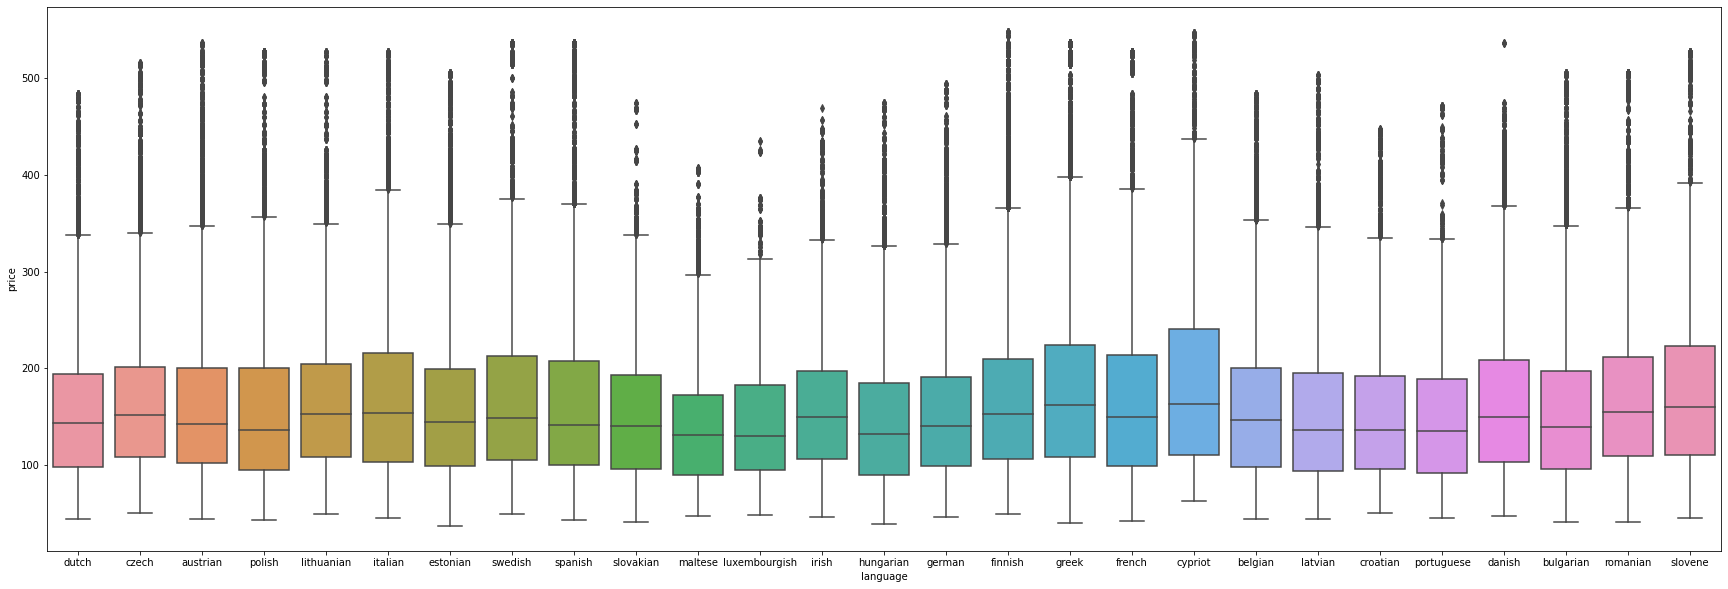

In [10]:
plt.figure(figsize = (30,10))
sns.boxplot(x='language', y='price', data=requests)

<font color='blue'> Au vu de la figure précédente, la langue ne semble pas influencer grandement le prix des hôtels. <font>

<AxesSubplot: xlabel='brand', ylabel='price'>

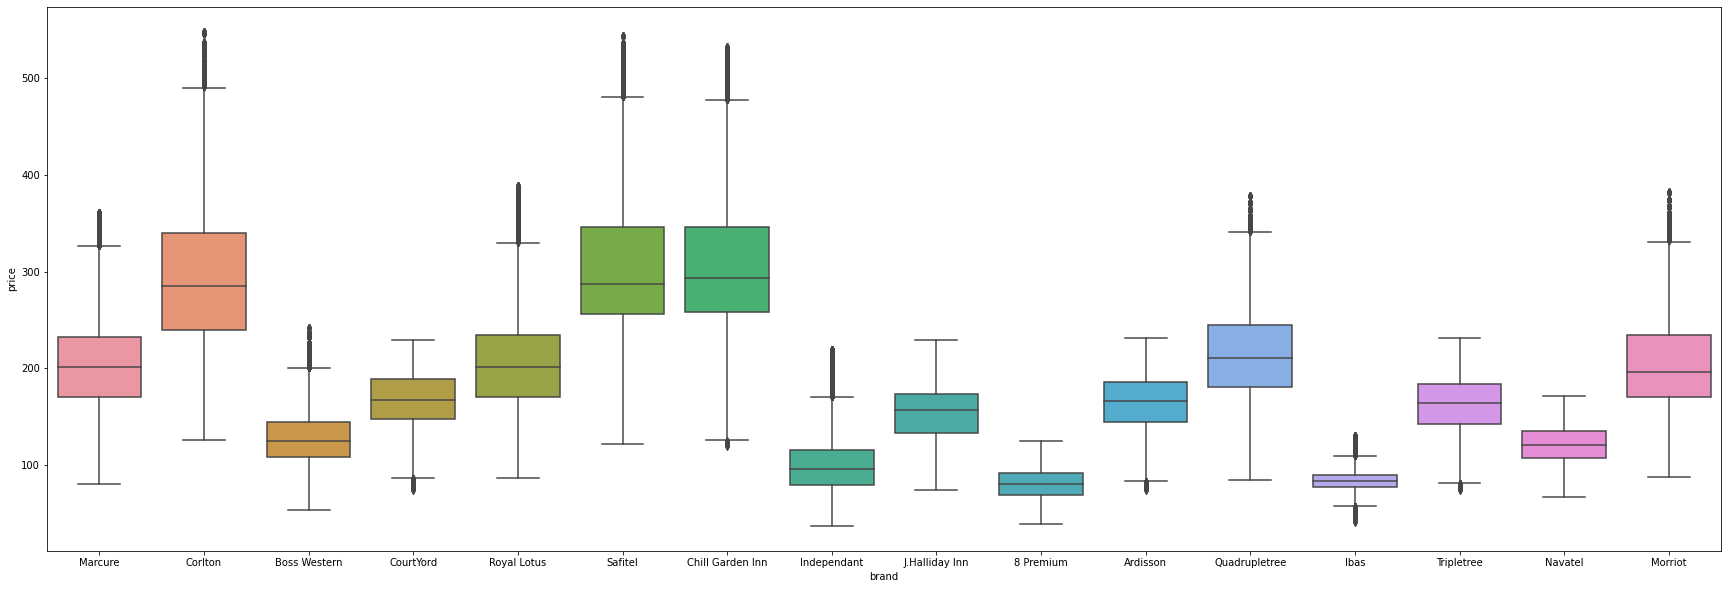

In [11]:
plt.figure(figsize = (30,10))
sns.boxplot(x='brand', y='price', data=requests)

<font color='blue'> La marque semble avoir une grande influence sur le prix des hôtels. En effet, les boxplots mettent en évidence des différences de moyenne non négligeables entre les différentes marques. Par exemple, les brands "Corlton", "Chill Garden" ainsi que "Safitel" semblent proposer des prix bien plus élevés que les autres marques. <font>

<AxesSubplot: xlabel='group', ylabel='price'>

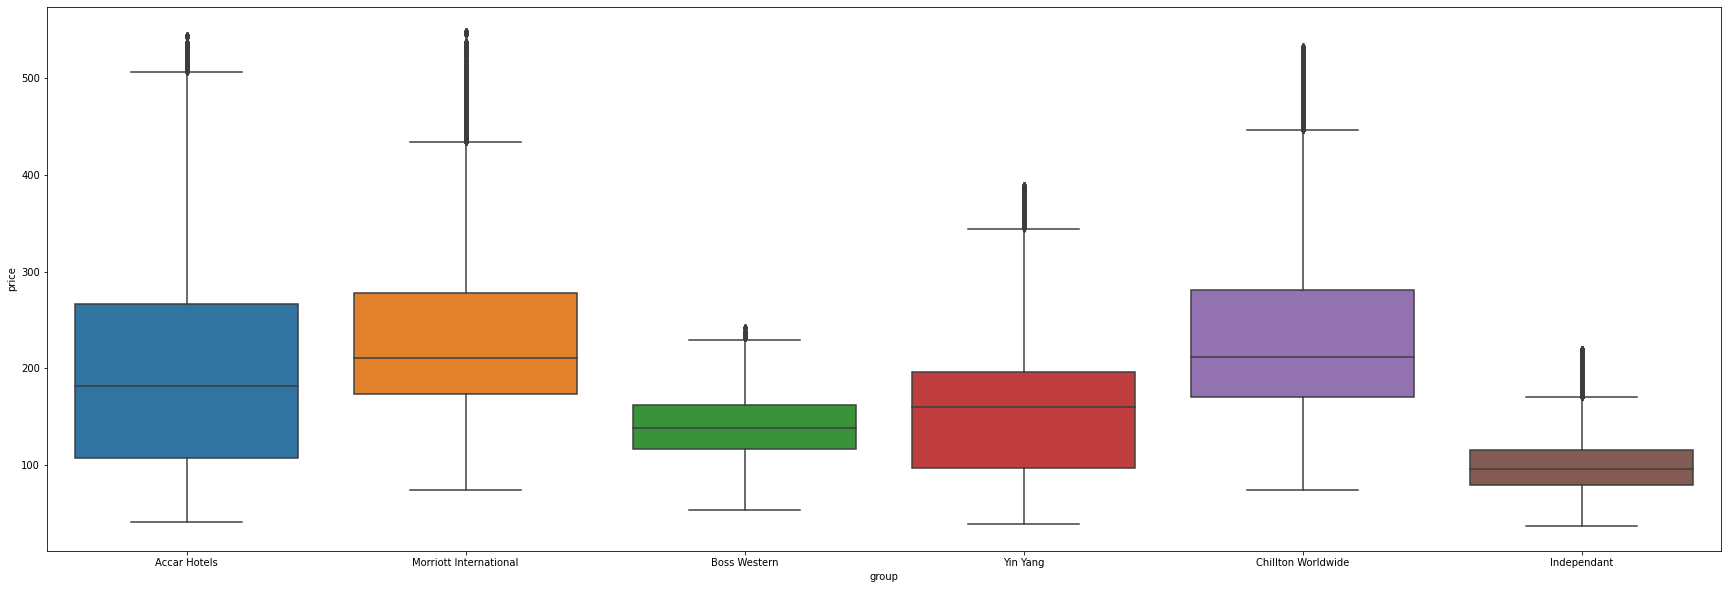

In [12]:
plt.figure(figsize = (30,10))
sns.boxplot(x='group', y='price', data=requests)

<font color='blue'> Les groupes aussi semblent avoir une influence importante sur le prix. Par exemple, on voit que les "indépendants" sont moins chers alors que les Chilllton et Morriott sont les plus chers. On remarque aussi que certains ont des grandes variabilités de prix comme les Accar Hotels. <font>

## AFCM (Analyse Factorielle des Correspondances Multiples)

<font color='blue'> Ici, nous avons conservé uniquement une petite portion du jeu de données car nous ne disposons pas de suffisamment d'espaces pour stocker l'intégralité des informations. 
L'AFCM permet de compléter les premières observations faites précédemment et d'avoir ainsi une idée du lien entre les variables et de l'influence du prix dans les observations. <font>

In [13]:
# on travaille ici sur des données plus petites car s'il y en a trop on a pas assez d'espace pour tout stocker
# ça permet tout de même de donner une idée des liens entre les différentes variables
requests2 = requests.sample(n=5000)

<font color='blue'> Nous avons de plus supprimer la variable "brand" pour l'AFCM car elle comporte un grand nombre de niveau et empêche donc une lecture correcte du graphe ci-après. <font>

In [14]:
# on transforme le prix de l'hotel en variables catégorielle à l'aide des quantiles d'ordre 0.33 et 0.66
quant_price=np.quantile(requests2['price'],[0.33,0.66])
data_afcm=requests2.assign(categ_price="medium_price")
data_afcm.loc[data_afcm.price<=quant_price[0],'categ_price']='low_price'
data_afcm.loc[data_afcm.price>=quant_price[1],'categ_price']='high_price'
data_afcm=data_afcm.drop(['price'], axis=1)

quant_stock=np.quantile(requests2['stock'],[0.33,0.66])
data_afcm=data_afcm.assign(categ_stock="medium_stock")
data_afcm.loc[data_afcm.stock<=quant_stock[0],'categ_stock']='low_stock'
data_afcm.loc[data_afcm.stock>=quant_stock[1],'categ_stock']='high_stock'
data_afcm=data_afcm.drop(['stock'], axis=1)


quant_date=np.quantile(requests2['date'],[0.33,0.66])
data_afcm=data_afcm.assign(categ_date="medium_date")
data_afcm.loc[data_afcm.date<=quant_date[0],'categ_date']='near_date'
data_afcm.loc[data_afcm.date>=quant_date[1],'categ_date']='far_date'
data_afcm=data_afcm.drop(['date'], axis=1)

#data_afcm=data_afcm.drop(['group'], axis=1)
data_afcm=data_afcm.drop(['brand'], axis=1)
#data_afcm=data_afcm.drop(['avatar_name'], axis=1)

data_afcm["categ_price"]=pd.Categorical(data_afcm["categ_price"],ordered=False)
#data_afcm["categ_stock"]=pd.Categorical(data_afcm["categ_stock"],ordered=False)
data_afcm["categ_date"]=pd.Categorical(data_afcm["categ_date"],ordered=False)
data_afcm["parking"]=pd.Categorical(data_afcm["parking"],ordered=False)
data_afcm["pool"]=pd.Categorical(data_afcm["pool"],ordered=False)
data_afcm["children_policy"]=pd.Categorical(data_afcm["children_policy"],ordered=False)
data_afcm["language"]=pd.Categorical(data_afcm["language"],ordered=False)
data_afcm["mobile"]=pd.Categorical(data_afcm["mobile"],ordered=False)
data_afcm["city"]=pd.Categorical(data_afcm["city"],ordered=False)

data_afcm

,group,city,parking,pool,children_policy,language,mobile,categ_price,categ_stock,categ_date
hotel_id,,,,,,,,,,
829,Boss Western,copenhagen,0,0,0,italian,0,high_price,low_stock,near_date
42,Morriott International,rome,0,1,0,bulgarian,1,high_price,medium_stock,medium_date
768,Accar Hotels,madrid,0,1,0,dutch,1,high_price,high_stock,far_date
766,Accar Hotels,copenhagen,0,1,0,swedish,0,high_price,low_stock,near_date
338,Yin Yang,paris,0,0,0,croatian,1,high_price,high_stock,far_date
...,...,...,...,...,...,...,...,...,...,...
684,Yin Yang,paris,0,0,0,belgian,0,low_price,low_stock,near_date
902,Yin Yang,amsterdam,1,1,0,danish,0,high_price,medium_stock,medium_date
416,Boss Western,sofia,1,0,0,swedish,0,low_price,medium_stock,medium_date


In [15]:
dc=pd.DataFrame(pd.get_dummies(data_afcm))
dc.head()

,group_Accar Hotels,group_Boss Western,group_Chillton Worldwide,group_Independant,group_Morriott International,group_Yin Yang,city_amsterdam,city_copenhagen,city_madrid,city_paris,...,mobile_1,categ_price_high_price,categ_price_low_price,categ_price_medium_price,categ_stock_high_stock,categ_stock_low_stock,categ_stock_medium_stock,categ_date_far_date,categ_date_medium_date,categ_date_near_date
hotel_id,,,,,,,,,,,,,,,,,,,,,
829,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
42,0,0,0,0,1,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
768,1,0,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,1,0,0
766,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
338,0,0,0,0,0,1,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0


In [16]:
mcaFic=MCA(dc,benzecri=False)

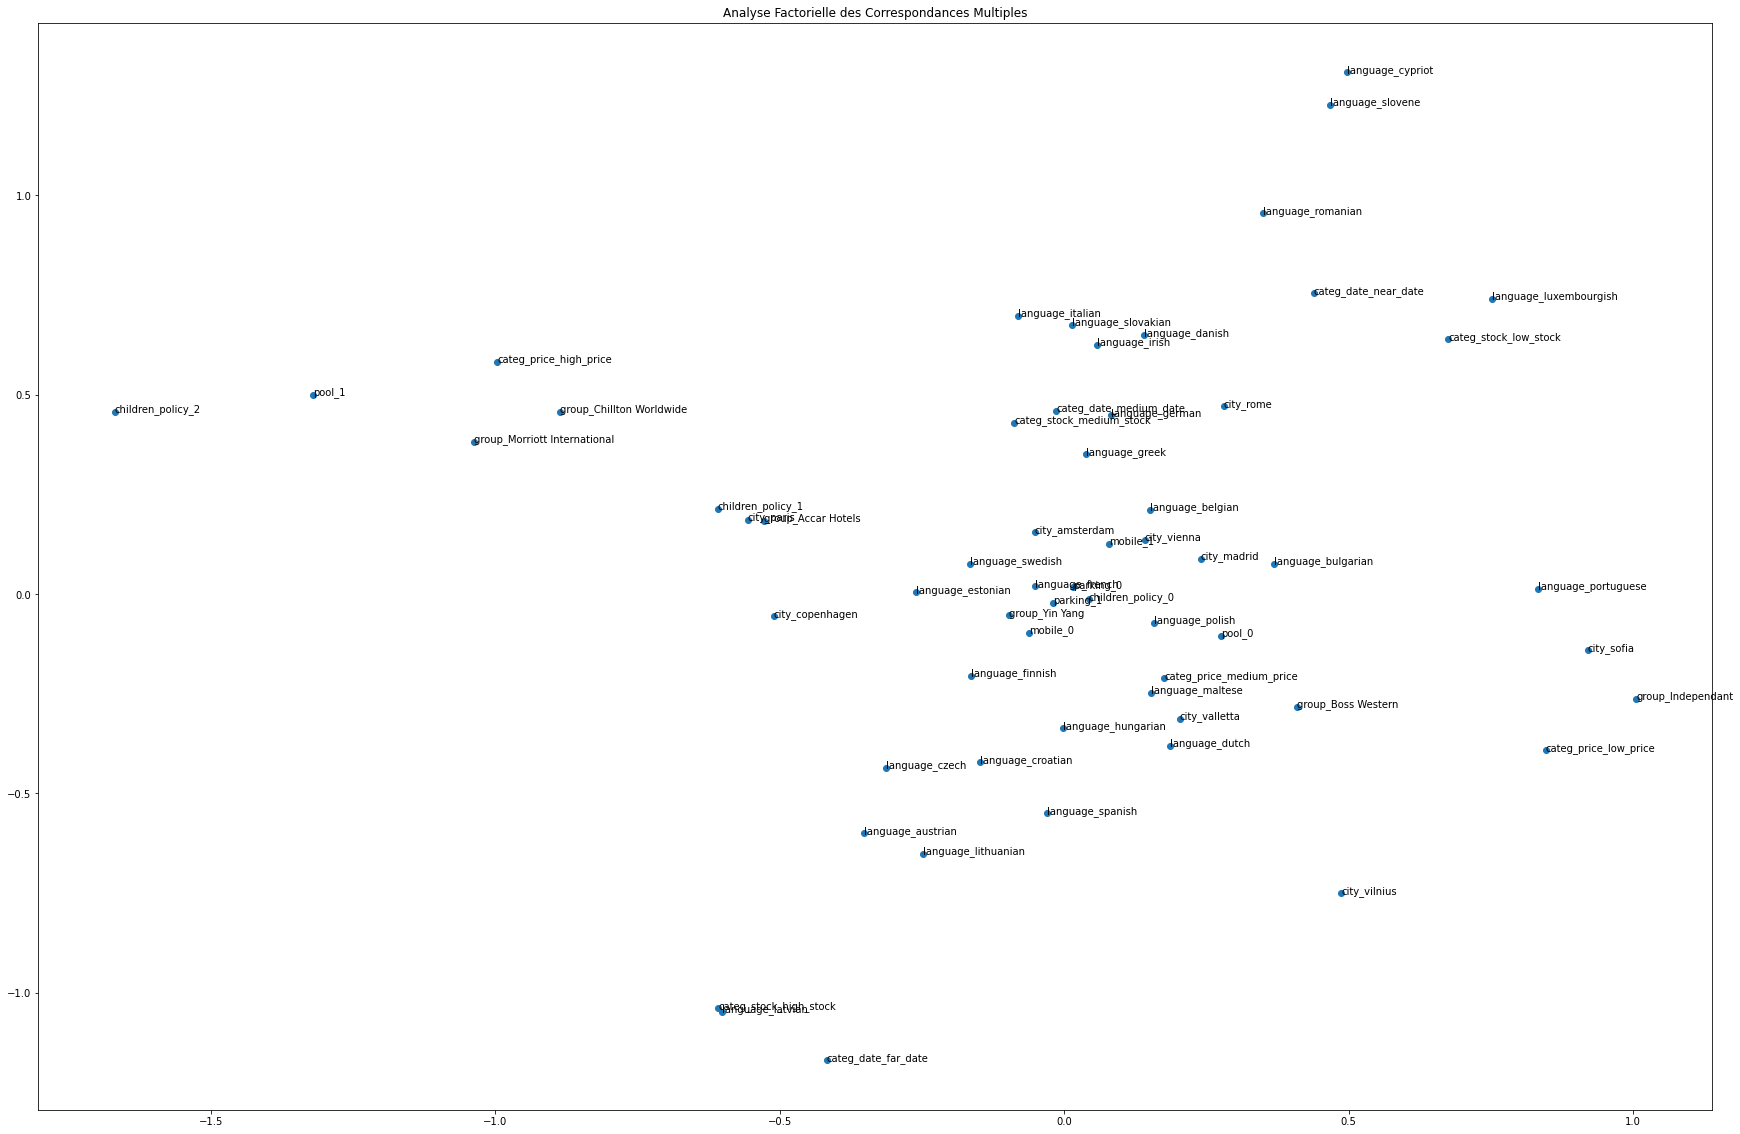

In [17]:
fig = plt.figure(1, figsize=(30, 20))
plt.scatter(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1])
for i, j, nom in zip(mcaFic.fs_c()[:, 0],mcaFic.fs_c()[:, 1], dc.columns):
       plt.text(i, j, nom)
plt.title("Analyse Factorielle des Correspondances Multiples")
plt.show()

<font color='blue'> L'AFCM nous permet de confirmer l'analyse descriptive faite précédemment. 
En effet, en haut à gauche, on retrouve les hôtels les plus chers (High Price) qui sont proches des caractéristiques piscines, children policy ainsi que des groupes Chillton ainsi que Morriot, ce que nous avions déjà constaté précédemment. De plus, nous remarquons une proximité de certaines villes (Paris et Copenhague) où les tarifs sont plus élevés. Enfin, nous voyons que le fait d'être français aurait tendance à rendre les prix plus élevés. <font>

<font color='blue'> Nous remarquons aussi que les prix faibles sont associés aux groupes indépendants et à la ville Sofia, ce qui confirme une fois de plus l'analyse précédente.
Enfin, nous observons que les prix "moyens" correspondent plutôt à des destinations tels que madrid ou bien valletta. <font>